# Import Libraries and Device Info

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Check the devices that are available for computation

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13001209040034519695
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11744020648677481895
physical_device_desc: "device: XLA_CPU device"
]


In [3]:
print(tf.__version__)

2.3.1


# Exploiratory Data Analysis

In [4]:
train_dir = './Datasets/train'
test_dir = './Datasets/test'

ImageDataGenerator generates batches of tensor image data with real-time data augmentation.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
data = ImageDataGenerator(rescale=1/255.0)

In [7]:
train_generator = data.flow_from_directory(directory=train_dir, target_size=(256,256), classes=['cats', 'dogs'], class_mode='binary', batch_size=20)

Found 20000 images belonging to 2 classes.


In [8]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [9]:
cv_generator = data.flow_from_directory(directory=test_dir, target_size=(256,256), classes=['cats', 'dogs'], class_mode='binary', batch_size=20)

Found 5000 images belonging to 2 classes.


In [10]:
print("The data size in each Train batch is:", len(train_generator))
print("The data size in each Cross Validation batch is:", len(cv_generator))

The data size in each Train batch is: 1000
The data size in each Cross Validation batch is: 250


# Build CNN based Transfer Model

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [12]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))

In [13]:
from tensorflow.keras.optimizers import SGD

In [14]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1048576)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               134217856 
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

#  Fitting Model

In [16]:
records = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=cv_generator, validation_steps=len(cv_generator), verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1000/1000 [==============================] - 898s 898ms/step - loss: 0.6831 - accuracy: 0.6168 - val_loss: 0.6637 - val_accuracy: 0.6608
Epoch 2/10
1000/1000 [==============================] - 823s 823ms/step - loss: 0.6228 - accuracy: 0.6619 - val_loss: 0.7080 - val_accuracy: 0.6078
Epoch 3/10
1000/1000 [==============================] - 830s 830ms/step - loss: 0.5965 - accuracy: 0.6867 - val_loss: 0.6611 - val_accuracy: 0.6610
Epoch 4/10
1000/1000 [==============================] - 843s 843ms/step - loss: 0.5810 - accuracy: 0.6962 - val_loss: 0.6690 - val_accuracy: 0.6356
Epoch 5/10
1000/1000 [==============================] - 842s 842ms/step - loss: 0.5444 - accuracy: 0.7268 - val_loss: 0.5952 - val_accuracy: 0.6786
Epoch 6/10
1000/1000 [==============================] - 845s 845ms/step - loss: 0.4836 - accuracy: 0.7684 - val_loss: 0.5763 - val_accuracy: 0.7132
Epoch 7/10
1000/1000 [==============

# Learning Curves

In [17]:
records.history

{'loss': [0.6830958724021912,
  0.6227867603302002,
  0.5964570641517639,
  0.5810078382492065,
  0.5443853139877319,
  0.48363468050956726,
  0.3999820947647095,
  0.4244217276573181,
  0.5476588606834412,
  0.5169386267662048],
 'accuracy': [0.6167500019073486,
  0.6619499921798706,
  0.6867499947547913,
  0.6962000131607056,
  0.7268499732017517,
  0.7683500051498413,
  0.817550003528595,
  0.8016499876976013,
  0.7193999886512756,
  0.7421500086784363],
 'val_loss': [0.6636999249458313,
  0.7079888582229614,
  0.6611359119415283,
  0.6690464615821838,
  0.5952222943305969,
  0.5762650966644287,
  0.5846903920173645,
  0.5741388201713562,
  0.8988378643989563,
  0.7554187774658203],
 'val_accuracy': [0.6607999801635742,
  0.6078000068664551,
  0.6610000133514404,
  0.6355999708175659,
  0.678600013256073,
  0.7131999731063843,
  0.7228000164031982,
  0.6922000050544739,
  0.5748000144958496,
  0.6837999820709229]}

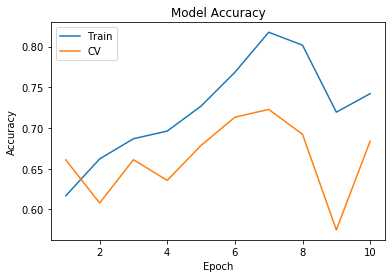

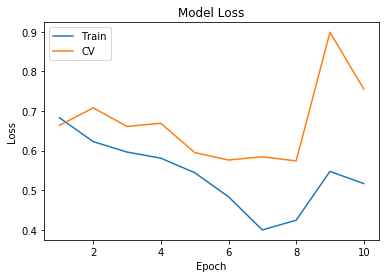

<Figure size 432x288 with 0 Axes>

In [19]:
# Plot Model Accuracy

epoch_range = range(1, 11)
plt.plot(epoch_range, records.history['accuracy'])
plt.plot(epoch_range, records.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'CV'], loc='upper left')
plt.show()
plt.savefig('accuracy_lc.png')
# plt.savefig('accuracy_lc.pdf')     To save figure as pdf

# Plot Model Loss

plt.plot(epoch_range, records.history['loss'])
plt.plot(epoch_range, records.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'CV'], loc='upper left')
plt.show()
plt.savefig('loss_lc.png')